In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'drug_consumption.data'
df = pd.read_csv(file_path)

# Show basic information and preview
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   AGE        1885 non-null   float64
 2   GENDER     1885 non-null   float64
 3   EDUCATION  1885 non-null   float64
 4   COUNTRY    1885 non-null   float64
 5   ETHNICITY  1885 non-null   float64
 6   NSCORE     1885 non-null   float64
 7   ESCORE     1885 non-null   float64
 8   OSCORE     1885 non-null   float64
 9   ASCORE     1885 non-null   float64
 10  CSCORE     1885 non-null   float64
 11  IMPULSIVE  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  ALCOHOL    1885 non-null   object 
 14  AMPHET     1885 non-null   object 
 15  AMYL       1885 non-null   object 
 16  BENZOS     1885 non-null   object 
 17  CAFF       1885 non-null   object 
 18  CANABIS    1885 non-null   object 
 19  CHOC       1885 non-null   object 
 20  COKE    

(None,
    ID      AGE   GENDER  EDUCATION  COUNTRY  ETHNICITY   NSCORE   ESCORE  \
 0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
 1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
 2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
 3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
 4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
 
     OSCORE   ASCORE  ...  ECSTASY  HEROIN  KETAMINE LEGALH  LSD METH  \
 0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
 1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
 2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
 3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
 4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   
 
   MUSHROOMS NICOTINE SEMER  VSA  
 0       CL0      CL2   CL0  CL0  
 1       CL0      C

In [39]:


#-------------------------------
import numpy as np
columns = df.columns

# Mapping des classes de consommation à des valeurs numériques
consumption_map = {
    "CL0": 0, "CL1": 1, "CL2": 2, "CL3": 3, "CL4": 4, "CL5": 5, "CL6": 6
}
drug_columns = columns[13:]  # de ALCOHOL à VSA

NORMALIZE = True  # Flag pour normaliser les données

# Convertir les colonnes de consommation
for col in drug_columns:
    df[col] = df[col].map(consumption_map)
    if NORMALIZE:
        df[col] = df[col] - np.mean(df[col])  # Centrer les données
        df[col] = df[col]/ np.std(df[col])  # Normaliser les données

# Convertir les colonnes numériques en float
for col in columns[1:13]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Vérification rapide après transformation
df[drug_columns].describe()
#-------------------------------




,ALCOHOL,AMPHET,AMYL,BENZOS,CAFF,CANABIS,CHOC,COKE,CRACK,ECSTASY,HEROIN,KETAMINE,LEGALH,LSD,METH,MUSHROOMS,NICOTINE,SEMER,VSA
count,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1885.000000,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1885.000000
mean,3.194615e-16,3.769457e-17,3.015566e-17,-2.261674e-17,1.074295e-16,1.658561e-16,-2.789399e-16,-5.277240e-17,-5.654186e-17,8.292806e-17,4.900295e-17,-4.146403e-17,0.000000,4.523349e-17,9.046698e-17,4.523349e-17,4.900295e-17,3.769457e-18,0.000000
std,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265
min,-3.482617e+00,-7.518218e-01,-5.704303e-01,-7.849088e-01,-4.921083e+00,-1.307219e+00,-4.689174e+00,-7.677180e-01,-3.556426e-01,-7.977865e-01,-3.615309e-01,-4.667006e-01,-0.757874,-7.121040e-01,-5.020820e-01,-8.098954e-01,-1.326209e+00,-5.994807e-02,-0.450487
25%,-4.771308e-01,-7.518218e-01,-5.704303e-01,-7.849088e-01,-4.341712e-01,-8.699331e-01,-9.791439e-02,-7.677180e-01,-3.556426e-01,-7.977865e-01,-3.615309e-01,-4.667006e-01,-0.757874,-7.121040e-01,-5.020820e-01,-8.098954e-01,-9.118376e-01,-5.994807e-02,-0.450487
50%,2.742406e-01,-7.518218e-01,-5.704303e-01,-7.849088e-01,4.632112e-01,4.639643e-03,-9.791439e-02,-7.677180e-01,-3.556426e-01,-7.977865e-01,-3.615309e-01,-4.667006e-01,-0.757874,-7.121040e-01,-5.020820e-01,-8.098954e-01,-8.309417e-02,-5.994807e-02,-0.450487
75%,1.025612e+00,3.698118e-01,3.694833e-01,8.221366e-01,4.632112e-01,8.792124e-01,8.203375e-01,5.544825e-01,-3.556426e-01,1.023563e+00,-3.615309e-01,-4.667006e-01,0.918878,6.295412e-01,-5.020820e-01,5.544056e-01,1.160021e+00,-5.994807e-02,-0.450487
max,1.025612e+00,2.613079e+00,5.069051e+00,2.429182e+00,4.632112e-01,1.316499e+00,8.203375e-01,3.198883e+00,6.814264e+00,2.844912e+00,5.438347e+00,4.452576e+00,2.595631,3.312832e+00,3.142686e+00,3.283008e+00,1.160021e+00,2.505163e+01,5.785747


Liste des drogues : ['ALCOHOL', 'AMPHET', 'AMYL', 'BENZOS', 'CAFF', 'CANABIS', 'CHOC', 'COKE', 'CRACK', 'ECSTASY', 'HEROIN', 'KETAMINE', 'LEGALH', 'LSD', 'METH', 'MUSHROOMS', 'NICOTINE', 'SEMER', 'VSA']


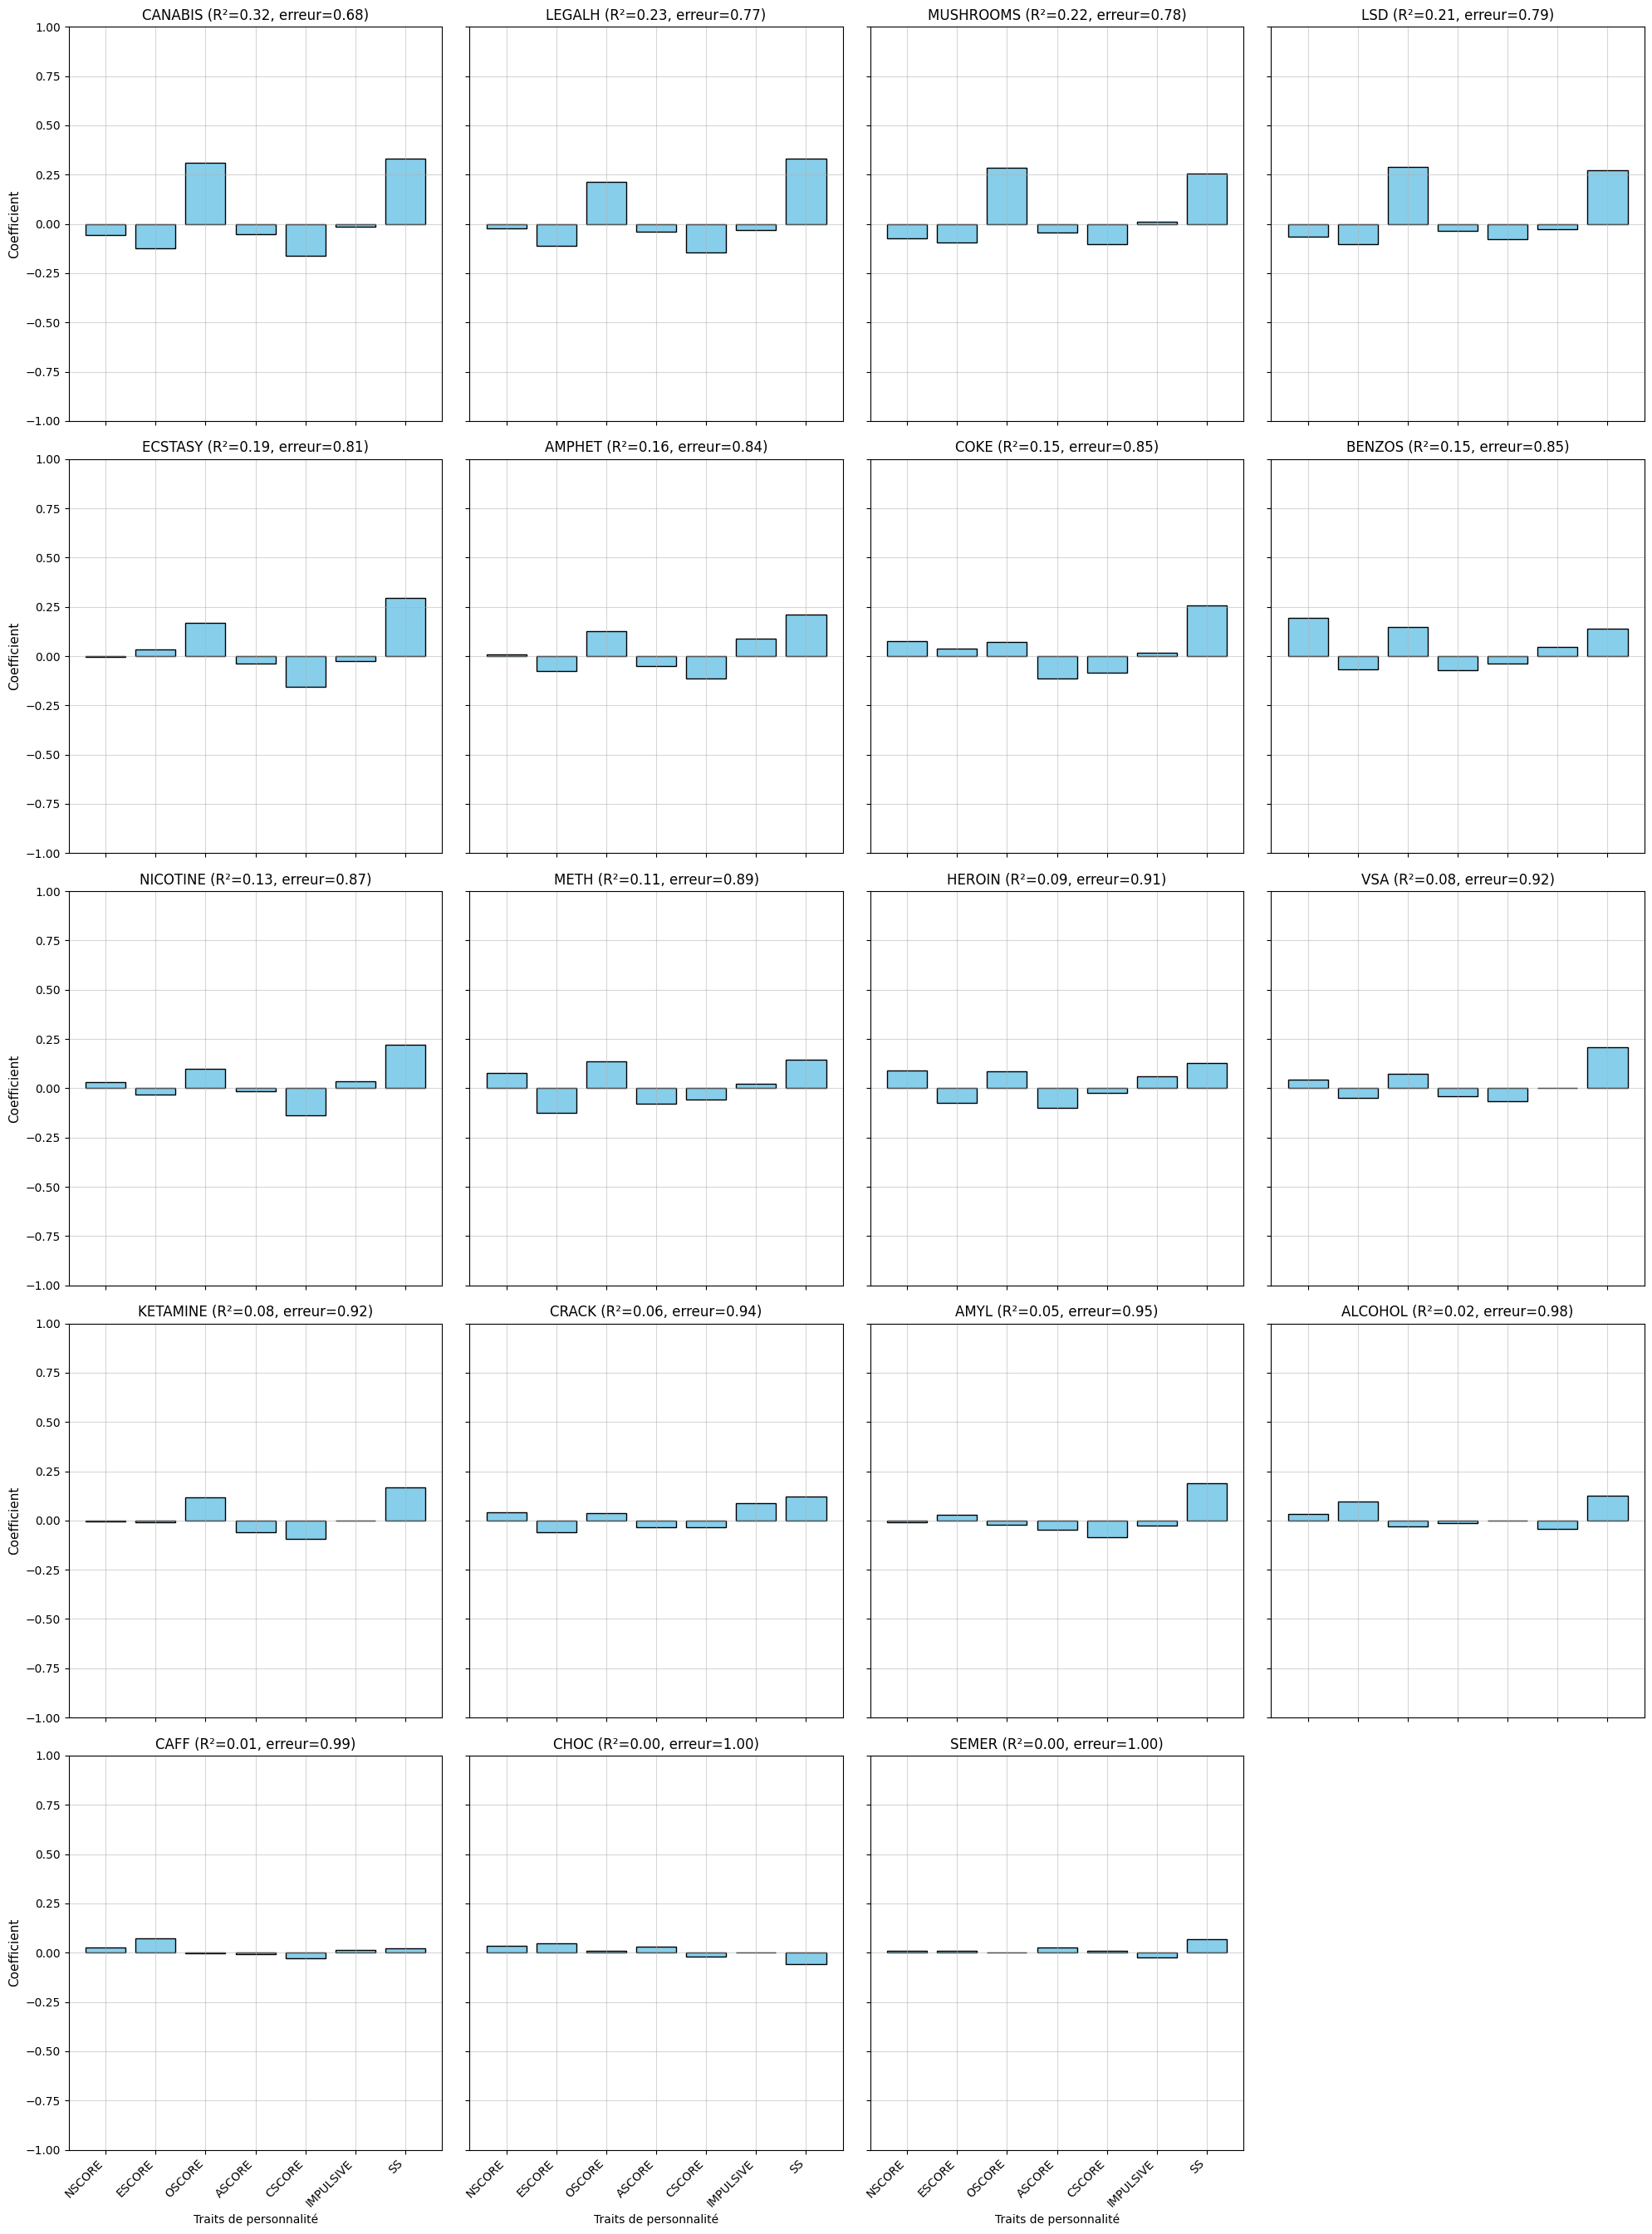

In [49]:
def regression(y_column:str,X_columns:list):

    # On met en valeur à retrouver la consommation de la drogue y_column
    y = df[y_column]

    # Indépendantes : traits de personnalité
    X = df[X_columns]

    # On ajoute une constante pour le biais
    x_transform = np.hstack([X, np.ones((X.shape[0], 1))])

    # On a les coefficients de la régression linéaire
    # On utilise la méthode des moindres carrés
    a = np.linalg.solve(x_transform.T@x_transform, x_transform.T@y)

    # Prédictions
    y_pred = x_transform @ a

    # Erreur quadratique moyenne
    mse = np.mean((y - y_pred) ** 2)

    # R²
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    ss_res = np.sum((y - y_pred) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    return r_squared, mse, pd.Series(a[:-1], index=X_columns)

DRUGS = df.columns[13:]
print("Liste des drogues :", DRUGS.tolist())

resultat = []

# On effectue la régression pour chaque drogue
for drug in DRUGS:
    R2, error, coeffs = regression(drug,["NSCORE", "ESCORE", "OSCORE", "ASCORE", "CSCORE", "IMPULSIVE", "SS"])
    resultat.append([drug,R2,error,coeffs])

# Tri des résultats par R²
sorted_resultat = sorted(resultat, key=lambda x:x[1], reverse=True)

nb_drogues = len(sorted_resultat)

fig, axs = plt.subplots(nb_drogues//4 +1, 4, figsize=(20, 27))



# Affichage des résultats
for i,elt in enumerate(sorted_resultat):
    ax = axs[i // 4, i % 4]
    ax.bar(elt[3].index, elt[3].values, color='skyblue', edgecolor='black')
    ax.set_xticks(elt[3].index)
    ax.set_xticklabels(elt[3].index, rotation=45, ha='right', fontsize=10)
    ax.set_title(f"{elt[0]} (R²={elt[1]:.2f}, erreur={elt[2]:.2f})")
    ax.set_xlabel('Traits de personnalité')
    ax.set_ylabel('Coefficient', fontsize=11)
    ax.set_ylim(-1, 1)
    ax.grid(True, alpha=0.5)

for i,ax in enumerate(axs.flat):
    if i >= len(sorted_resultat):
        ax.set_visible(False)  # Masquer les axes inutilisés
    else:
        ax.label_outer()  # Ne pas afficher les labels des axes intérieurs

plt.tight_layout()
plt.savefig('./image_matplotlib/regression_results.png', dpi=300)

